# 4. 趋势理论_通道篇
*用Python量化你的技术分析*

## 目录
- 通道是什么？
- 不同通道是怎么计算的？
- 通道如何用图表显示？
- 如何用通道构建策略？

## 通道是什么？
通道突破是技术分析中一个判断趋势的重要方法，其观念在于市场价格穿透了之前的价格压力或支撑，继而形成一股新的趋势，而交易策略的目标即是在突破发生时能够确认并建立仓位以获取趋势的利润。

## 不同通道是怎么计算的？
---
### 1. 均线百分比通道

$Upper = MA*1.03$

$lower = MA*0.97$

---

### 2. 布林带通道
$upper = MA+2\sigma$

$lower = MA-2\sigma$

---

### 3. 平均波幅通道
$upper = MA + ATR$

$lower = MA - ATR$

---

### 4. 高低价通道
$upper = Max(High,20)$

$lower = Min(low,20)$

## 通道如何用图表显示？

In [1]:
import talib as ta
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')

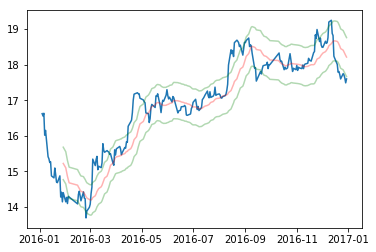

In [2]:
#均线百分比通道
middleband = ta.abstract.MA(data, timeperiod=20)
upperband = middleband*1.03
lowerband = middleband*0.97
data_B = pd.concat([middleband, upperband , lowerband], axis=1)
data_B.columns = ['middleband','upperband','lowerband']
plt.plot(data['close'])
plt.plot(data_B['middleband'], 'r', alpha=0.3)
plt.plot(data_B['upperband'], 'g', alpha=0.3)
plt.plot(data_B['lowerband'], 'g', alpha=0.3)
plt.show()

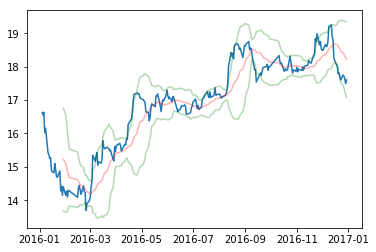

In [3]:
#布林带
data_B= ta.abstract.BBANDS(data, timeperiod=20)
plt.plot(data['close'])
plt.plot(data_B['middleband'], 'r', alpha=0.3)
plt.plot(data_B['upperband'], 'g', alpha=0.3)
plt.plot(data_B['lowerband'], 'g', alpha=0.3)
plt.show()

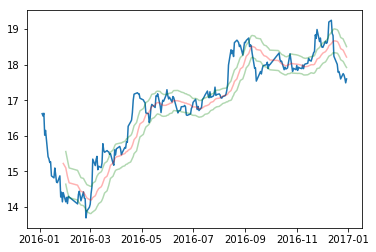

In [4]:
#平均波幅率通道线
atr = ta.abstract.ATR(data, 20)
middleband = ta.abstract.MA(data,20)
upperband = middleband + atr
lowerband = middleband - atr
data_B = pd.concat([middleband, upperband, lowerband], axis=1)
data_B.columns = ['middleband', 'upperband', 'lowerband']
plt.plot(data['close'])
plt.plot(data_B['middleband'], 'r', alpha=0.3)
plt.plot(data_B['upperband'], 'g', alpha=0.3)
plt.plot(data_B['lowerband'], 'g', alpha=0.3)
plt.show()

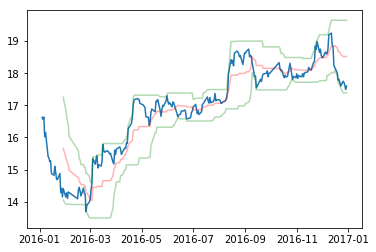

In [5]:
#高低价通道
upperband = ta.abstract.MAX(data, 20, price='high')
lowerband = ta.abstract.MIN(data, 20, price='low')
middleband = (upperband+lowerband)/2
data_B = pd.concat([middleband, upperband, lowerband], axis=1)
data_B.columns = ['middleband', 'upperband', 'lowerband']
plt.plot(data['close'])
plt.plot(data_B['middleband'], 'r', alpha=0.3)
plt.plot(data_B['upperband'], 'g', alpha=0.3)
plt.plot(data_B['lowerband'], 'g', alpha=0.3)
plt.show()

## 如何用通道构建策略？

Donchian’s 5 and 20 day MA and Breakout system
- A 5-day moving average
- A 20-day moving average
- The average true range based on 20-day

Buy: 

$Close_t > MA5_{t−1} + ATR_{t−1} \text{ and } Close_t > MA20_{t−1} + ATR_{t−1}$

Exit: 
$Close_t < MA5_{t−1} - ATR_{t−1} \text{ or } Close_t < MA20_{t−1} - ATR_{t−1}$

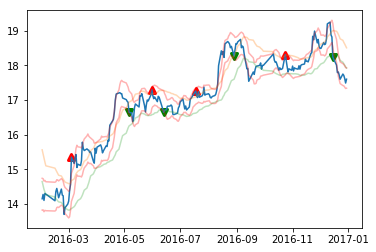

In [6]:
atr = ta.abstract.ATR(data, 20)
data['SMA20'] = ta.abstract.MA(data, 20)
data['SMA5'] = ta.abstract.MA(data, 5)
data['upperband20'] = data['SMA20'] + atr
data['lowerband20'] = data['SMA20'] - atr
data['upperband5'] = data['SMA5'] + atr
data['lowerband5'] = data['SMA5'] - atr

buy_time=[]
buy_price=[]

sell_time=[]
sell_price=[]

data = data.dropna()
it = data.iterrows()
t0, d0 = next(it)
pos = 0

for t1, d1 in it:
    if pos == 0 and d1.close > d0.upperband5 and d1.close > d0.upperband20:
        buy_time.append(t1)
        buy_price.append(d1.close)
        pos = 1
    elif pos == 1 and (d1.close < d0.lowerband5 or d1.close < d0.lowerband20):
        sell_time.append(t1)
        sell_price.append(d1.close)
        pos = 0
    t0, d0 = t1, d1

plt.plot(data['close'])
plt.plot(data['upperband20'], alpha=0.3)
plt.plot(data['lowerband20'], alpha=0.3)
plt.plot(data['upperband5'], alpha=0.3,c='r')
plt.plot(data['lowerband5'], alpha=0.3,c='r')

plt.scatter(buy_time, buy_price, c='r', marker='^', linewidths=3)
plt.scatter(sell_time, sell_price, c='g', marker='v', linewidths=3)
plt.show()

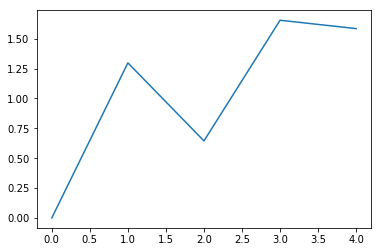

In [9]:
import numpy as np
money = np.array(sell_price) - np.array(buy_price)
money = list(money)
money.insert(0,0)
money = np.array(money)
capital = money.cumsum()
plt.plot(capital)
plt.show()

# 作业：
写一个高低价通道突破策略